Be sure to load weather_data.csv before running

In [1]:
#Author: Rene Lisasi
#Deep Learning
#Assignment 1: Linear Regression

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
datafile = "weather_data.csv"


In [4]:
def get_data(filename):
    df = pd.read_csv(filename)
    X_ = df[["Humidity","Visibility (km)"]]
    Y_ = df[["Temperature (C)"]]
    #remove 1 row from each because 7321 is unfactorable and makes it hard to batch
    X_ = X_.drop(index=X_.index[-1])
    Y_ = Y_.drop(index=Y_.index[-1])
    # Spliting data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_, Y_, test_size=0.25, random_state=42)
    return X_train, X_test, y_train, y_test

In [5]:
X_train, X_test, y_train, y_test = get_data(datafile)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(72321, 2) (24107, 2) (72321, 1) (24107, 1)


In [6]:
from math import ceil
def data_iter(batch_size, X, y):
    x_batch=np.array_split(X, ceil(len(X) / batch_size))
    y_batch=np.array_split(y, ceil(len(y) / batch_size))
    return x_batch,y_batch


Below choose which

In [7]:
batch_size = 64 #small
features=X_train
labels=y_train
for X,y in zip(*data_iter(batch_size, features, labels)):
    print(X, '\n', y)
    break


       Humidity  Visibility (km)
21572      0.78            0.711
33021      0.87            0.597
87582      0.53            1.000
13425      0.68            0.696
44193      0.47            0.696
...         ...              ...
3908       0.93            0.655
82691      0.37            0.966
72705      0.92            0.295
57763      0.88            0.711
55088      0.85            0.380

[64 rows x 2 columns] 
        Temperature (C)
21572         0.654213
33021         0.505343
87582         0.652556
13425         0.696711
44193         0.637727
...                ...
3908          0.709800
82691         0.872836
72705         0.478834
57763         0.378013
55088         0.374203

[64 rows x 1 columns]


In [8]:
batch_size = 732 #medium
features=X_train
labels=y_train
for X,y in zip(*data_iter(batch_size, features, labels)):
    print(X, '\n', y)
    break

       Humidity  Visibility (km)
21572      0.78            0.711
33021      0.87            0.597
87582      0.53            1.000
13425      0.68            0.696
44193      0.47            0.696
...         ...              ...
22808      0.68            0.620
63051      0.96            0.246
59804      0.89            0.926
34949      0.74            0.941
39864      0.90            0.926

[731 rows x 2 columns] 
        Temperature (C)
21572         0.654213
33021         0.505343
87582         0.652556
13425         0.696711
44193         0.637727
...                ...
22808         0.489355
63051         0.320769
59804         0.490680
34949         0.726535
39864         0.651230

[731 rows x 1 columns]


In [9]:
batch_size = 2440 #large
features=X_train
labels=y_train
for X,y in zip(*data_iter(batch_size, features, labels)):
    print(X, '\n', y)
    break

       Humidity  Visibility (km)
21572      0.78            0.711
33021      0.87            0.597
87582      0.53            1.000
13425      0.68            0.696
44193      0.47            0.696
...         ...              ...
61047      0.34            0.620
91621      0.43            1.000
20368      0.81            0.295
10137      0.65            0.700
62450      0.59            0.943

[2411 rows x 2 columns] 
        Temperature (C)
21572         0.654213
33021         0.505343
87582         0.652556
13425         0.696711
44193         0.637727
...                ...
61047         0.844586
91621         0.842432
20368         0.537238
10137         0.678237
62450         0.682628

[2411 rows x 1 columns]


 ## create and initialize model parameter

In [10]:
#generate random weights
def create_model_parameter(mu, sigma, row, column):
    w = np.random.normal(mu, sigma, size=(row, column))
    b = 0
    return w,b


In [11]:
print(f'Randomly generated params: {create_model_parameter(np.mean(X_train),np.std(X_train),1,2)}')

Randomly generated params: (array([[0.9329849 , 0.65785409]]), 0)


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [12]:
def model(X, w, b):
    """The linear regression model."""
    #predict my taking the dot product of transpose
    z=np.dot(X,w.T)+b
    return z


In [21]:
pred=model(X_train,np.array([[0.68597332, 0.57832678]]),0)
print(f'Prediction: {pred}')

Prediction: [[0.94624953]
 [0.94205788]
 [0.94189264]
 ...
 [0.91555204]
 [0.92106073]
 [1.12341192]]


In [14]:
def squared_loss(y_hat, y):
    """Squared loss."""
    #write your code here for loss function
    m=y.size
    difference=np.subtract(y_hat,y)
    square=np.square(difference)
    sum=np.sum(square)
    loss=(1/2*m)*(sum)
    return loss


In [22]:
sl=squared_loss(pred,y_train)
print(f'Squared Loss: {sl}')

Squared Loss: Temperature (C)    3.898313e+08
dtype: float64


In [17]:
def gradient(x,yhat,y):
    #compute gradient of loss function with respect to params
    m=yhat.size
    xt=x.T
    difference=np.subtract(yhat,y)
    grads=(1/m)*np.dot(xt,difference)
    return grads


In [23]:
gr=gradient(X_train,pred,y_train)
print(f'Gradients matrix: {gr}')

Gradients matrix: [[0.25506953]
 [0.20405024]]


In [24]:
def sgd(w,b, grads, lr, batch_size):
    """Minibatch stochastic gradient descent."""
    #code for updating your parameter using gradient descent algorithm
    w = np.subtract(w, (lr * np.sum(grads))/batch_size)
    b= b - (lr * np.sum(grads))/batch_size
    return w,b

In [26]:
print(f'Updated Params: {sgd(np.array([[0.5621414 , 0.94787148]]),-0.0005095559008283894,gr,0.05,64)}')

Updated Params: (array([[0.56178271, 0.94751279]]), -0.0008682432234458213)


In [27]:
def train(lr,num_epochs,X,y,w,b,batch_size):
    print(f'staring w: {w} b:{b}')
    losses=[]
    mse_list=[]
    epochs=[]
    for epoch in range(num_epochs):
        for X,y in zip(*data_iter(batch_size, features, labels)):
            #1. use weight to get yhat
            yhat=model(X,w,b)
            #2. calculate the loss and append it
            loss=squared_loss(yhat,y)
            # print(yhat,loss)
            losses.append(loss)
            #3. calculate the new gradient
            grads=gradient(X,yhat,y)
            #4. apply the new gradient in sgd
            w,b=sgd(w,b,grads,lr,batch_size)

        mse=np.mean(losses)
        mse_list.append(np.mean(losses))
        epochs.append(epoch)
        print(f'epoch {epoch+1}, loss: {mse}')
    print(f'ending w: {w} b:{b}')
    return w,b,mse_list,epochs


In [28]:
def test(X,y,w,b,batch_size):
    # predict temperature for the given humidity and visibility
    print(f'staring w: {w} b:{b}')
    losses=[]
    mse_list=[]
    for X,y in zip(*data_iter(batch_size, features, labels)):
            #1. use weight to get yhat
            yhat=model(X,w,b)
            #2. calculate the loss and append it
            loss=squared_loss(yhat,y)
            # print(yhat,loss)
            losses.append(loss)
    mse=np.mean(losses)
    mse_list.append(mse)
    print(f'Test mse: {mse}')
    return mse,losses


In [29]:
def draw_loss(epochs,loss1,loss2,loss3):
    plt.plot(epochs,loss1,marker='o')
    plt.plot(epochs,loss2,marker='o')
    plt.plot(epochs,loss3,marker='o')
    plt.show()

In [30]:
X_train
y_train
rows=1
cols=X_train.shape[1]
#initialize weights and intercept
w,b=create_model_parameter(np.mean(X_train),np.std(X_train),rows,cols)
w1=w
w2=w
b1=b
b2=b

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [31]:
#train
lr=0.05
num_epochs=5

In [32]:
#small batch
batch_size=64
w,b,mse_list1,epochs=train(lr,num_epochs,X_train,y_train,w,b,batch_size)

staring w: [[0.88824909 0.73963291]] b:0
epoch 1, loss: 222.3156189912875
epoch 2, loss: 167.53944034190323
epoch 3, loss: 149.32348093304188
epoch 4, loss: 140.22105110719372
epoch 5, loss: 134.75983146474397
ending w: [[0.64364115 0.49502497]] b:-0.24460793438356956


In [33]:
#medium batch
batch_size=732
w1,b1,mse_list2,epochs=train(lr,num_epochs,X_train,y_train,w1,b1,batch_size)

staring w: [[0.88824909 0.73963291]] b:0
epoch 1, loss: 100460.9367258703
epoch 2, loss: 98523.35829105639
epoch 3, loss: 96643.55153980746
epoch 4, loss: 94819.58879431442
epoch 5, loss: 93049.61080557316
ending w: [[0.86206797 0.71345179]] b:-0.026181115228940965


In [34]:
#large batch
batch_size=2440
w2,b2,mse_list3,epochs=train(lr,num_epochs,X_train,y_train,w2,b2,batch_size)

staring w: [[0.88824909 0.73963291]] b:0
epoch 1, loss: 1113594.5175690681
epoch 2, loss: 1111595.713424852
epoch 3, loss: 1109602.4383300443
epoch 4, loss: 1107614.6751689457
epoch 5, loss: 1105632.4068822272
ending w: [[0.88574488 0.7371287 ]] b:-0.002504208455644894


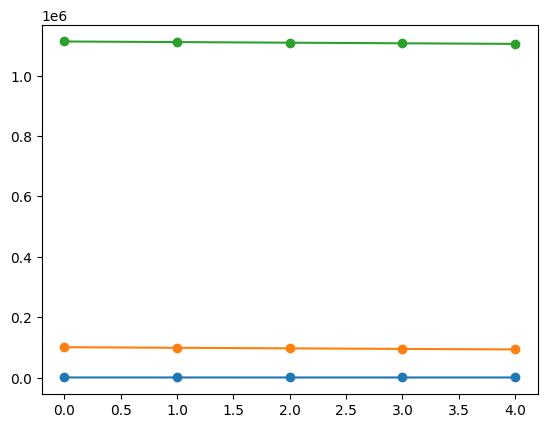

In [35]:
#show the difference in loss between batch sizes
draw_loss(epochs,mse_list1,mse_list2,mse_list3)

When I refer to batch size here I am refering to the number of samples in the batch (batch_size = 7000 is a batch full of 7000 samples). The more samples in a batch, the greater the loss. Bigger batches work super fast while smaller ones take a while. This is because less matrix operations occur when the batch is big however, accuracy is lost because the data is generalized.

Bigger batch size (bigger amount of samples per batch) is fast but not accurate and doesn't fully utilize computation resources. The opposite is slower but more accurate meaning less loss but wastes resources for similar xi. When doing simple LR by hand I found myself doing multiple operations on the same x.

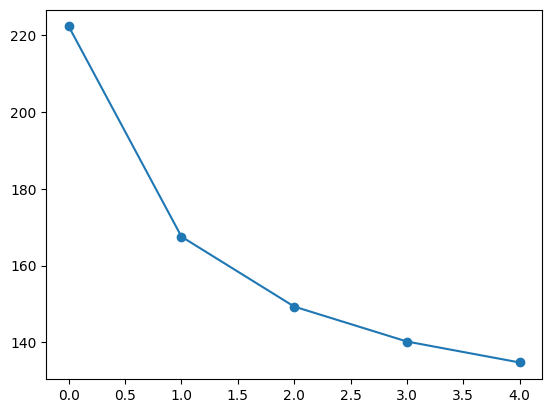

In [36]:
#focus on the small batch
plt.plot(epochs,mse_list1,marker='o')
plt.show()

In [37]:
batch_size=64
mse=test(X_test,y_test,w,b,batch_size)

staring w: [[0.64364115 0.49502497]] b:-0.24460793438356956
Test mse: 112.90005788527783


In [38]:
#test with real data vector
print(model([0.62,6.6],w,b))

[3.42161441]
